In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree as sktree

# Our classes
sys.path.insert(0, os.getcwd() + '/../')

from src.utils import dataset
from src.utils import data
from src.utils import evaluation
from src.supervised_learning.decision_tree import ClassificationDecisionTree

# Classification Decision Tree

In [2]:
# Load dataset
iris_data = datasets.load_iris()
x = iris_data.data
y = iris_data.target
x_train, y_train, x_test, y_test = dataset.split_train_test_dataset(x, y, split_size=0.6)

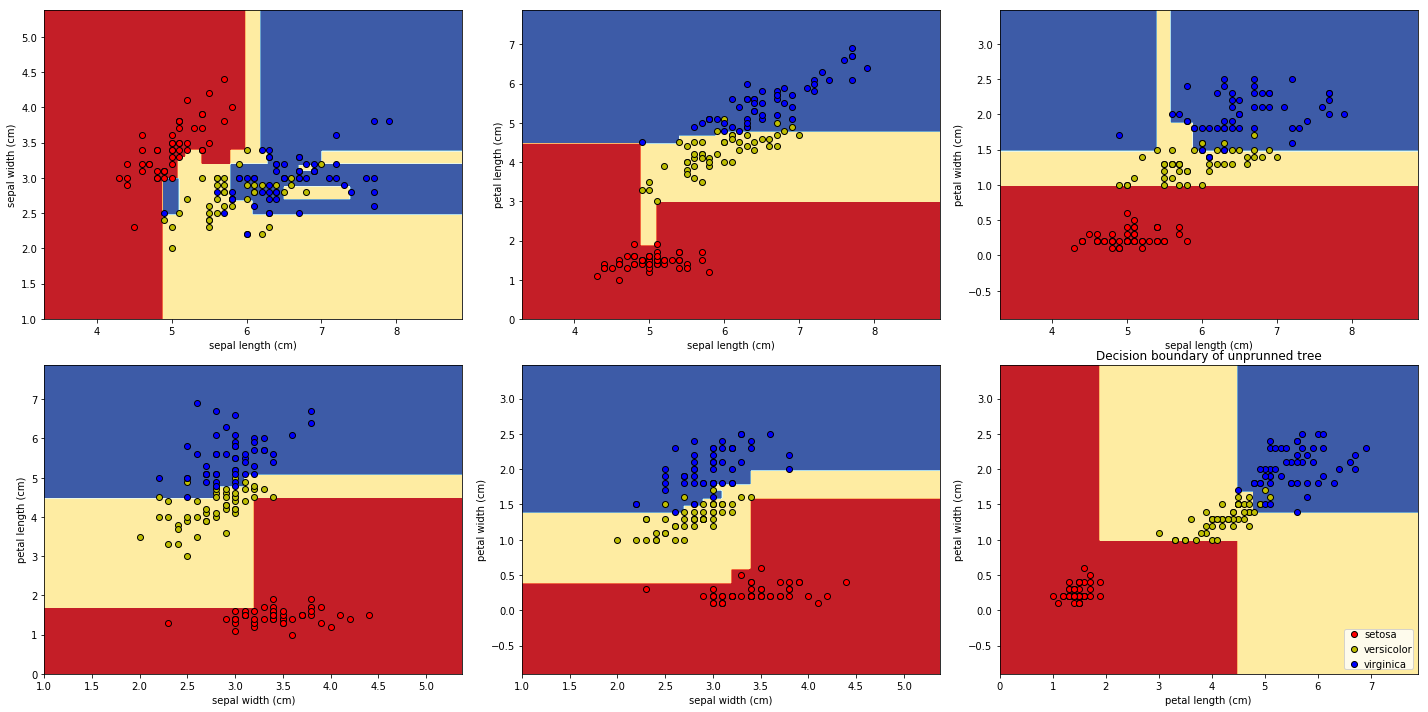

In [3]:
# Parameters for classification
n_classes = 3
plot_step = 0.02
plot_colors = "ryb"

# Classify the values
# http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
plt.figure(1, figsize=(20, 10))
for i, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # Fetch only the data corresponding to pair
    x_train_class = x[:, pair]
    y_train_class = y

    # Train the classifier
    clf = ClassificationDecisionTree()
    clf.train(x_train_class, y_train_class)
    
    # Plot the decision boundary
    plt.subplot(2, 3, i+1)
    x_min, x_max = x_train_class[:, 0].min() - 1, x_train_class[:, 0].max() + 1
    y_min, y_max = x_train_class[:, 1].min() - 1, x_train_class[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    plt.tight_layout()
    
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, z, cmap=plt.cm.RdYlBu)
    
    plt.xlabel(iris_data.feature_names[pair[0]])
    plt.ylabel(iris_data.feature_names[pair[1]])
    
    # Plot the training points
    for j, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train_class == j)
        plt.scatter(x_train_class[idx, 0], x_train_class[idx, 1], c=color, label=iris_data.target_names[j],
                    cmap=plt.cm.RdYlBu, edgecolor='black')

plt.title("Decision boundary of unprunned tree")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()